Redes neuronales convolucionales
=========================
Son redes neuronales artificiales que reciben como entrada una matriz de píxeles de una imagen y tienen como salida probabilidades de cada clase, dentro de sus capas ocultas están:

* La capa (s) de convolución es aquella donde se aplican filtros que obtienen rasgos característicos de la imagen y a estos se les aplica una función de activación que eliminan linealidades comunes en la convolución.
* La capa (s) de max pooling es un muestreo donde se obtiene el máximo valor de un conjunto de píxeles.
* La capa de full connection es una red neuronal tradicional.

<center>

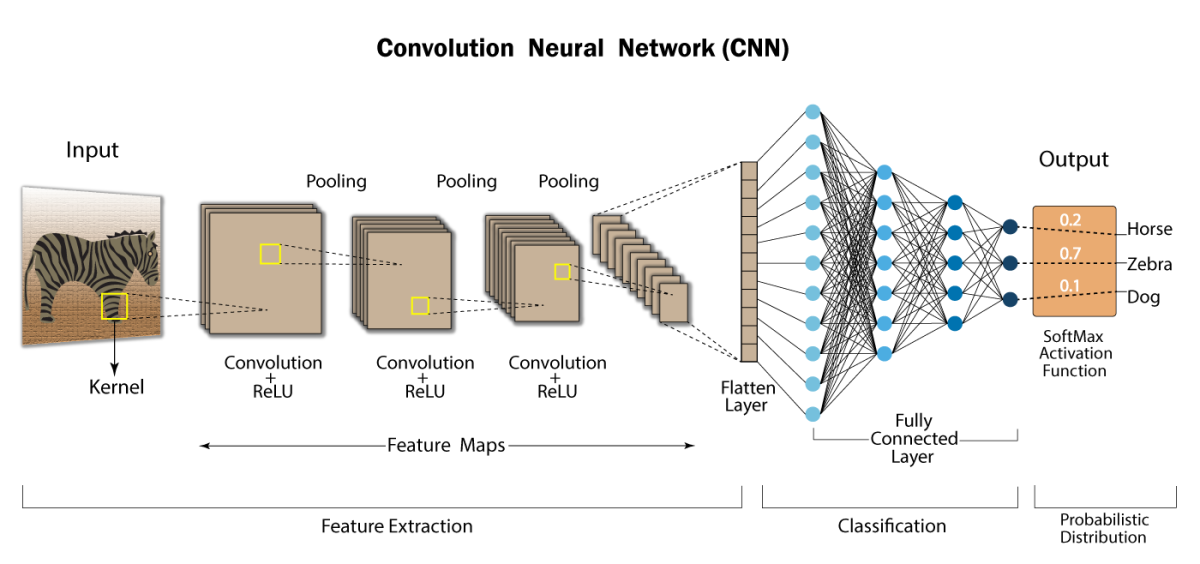

</center>

Convolución
=========================
La convolución es una operación matemática que se utiliza para obtener características de una imagen, se aplica un filtro a la imagen y se obtiene una nueva imagen con características de la original.

<center>

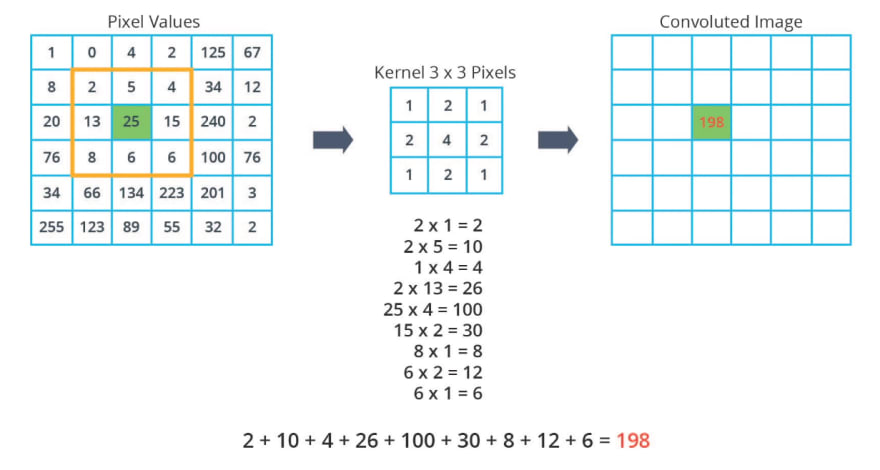

</center>

ReLU
=========================
La función de activación ReLU (Rectified Linear Unit) es una función que se utiliza para eliminar linealidades en la convolución, se aplica a cada píxel de la imagen y si el valor es menor a cero se convierte en cero, si es mayor a cero se deja igual. 

<center>

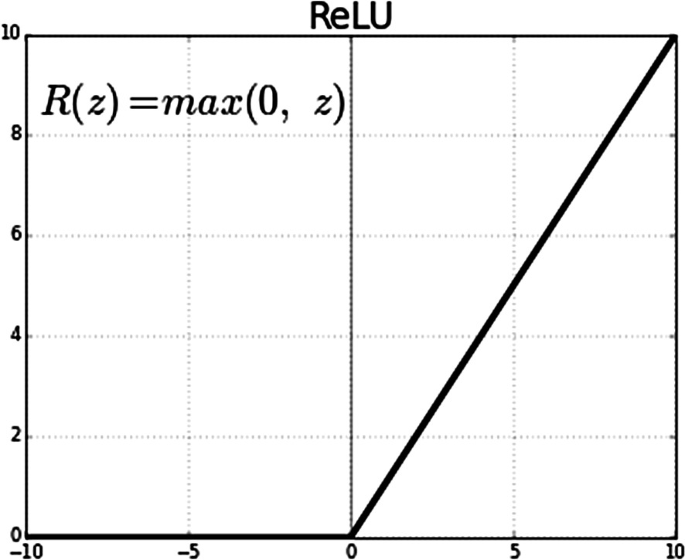

</center>

Max Pooling
=========================
El max pooling es un muestreo que se aplica a la imagen después de la convolución, se obtiene el máximo valor de un conjunto de píxeles y se convierte en un solo píxel.

<center>

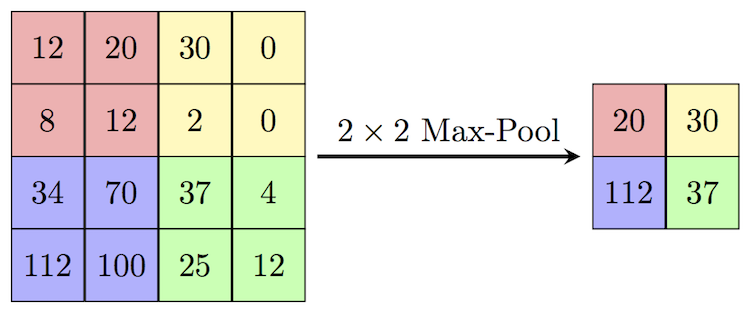

</center>

Flattening
=========================
Consiste en convertir la salida del max pooling en un vector de una sola dimensión que sirva como entrada ára la red neuronal artificial.

<center>

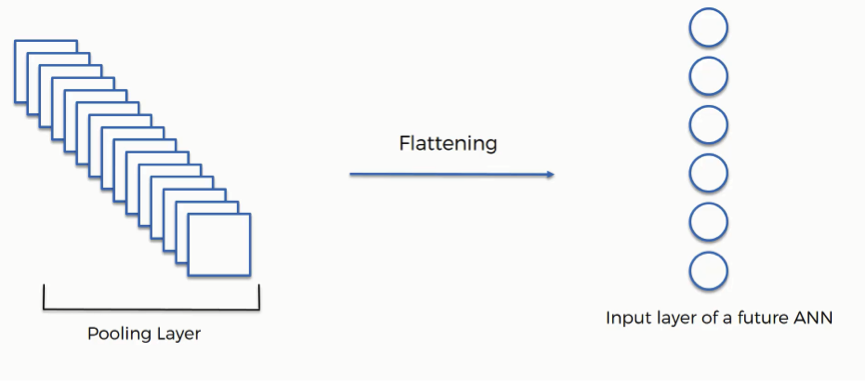

</center>

Full Connection
=========================
Es una red neuronal artificial tradicional, se aplica una función de activación a cada neurona y se obtiene la salida.

<center>

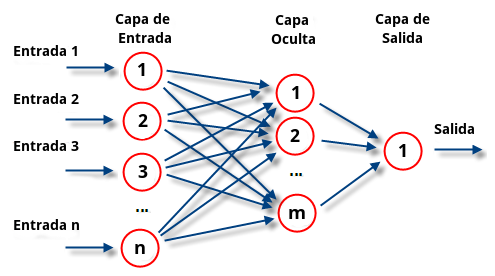

</center>

Softmax
=========================
Es una función que nos permite obtener la probabilidad de cada clase, se aplica a la salida de la red neuronal artificial y se obtiene un vector de probabilidades complementarios entre si.

<center>

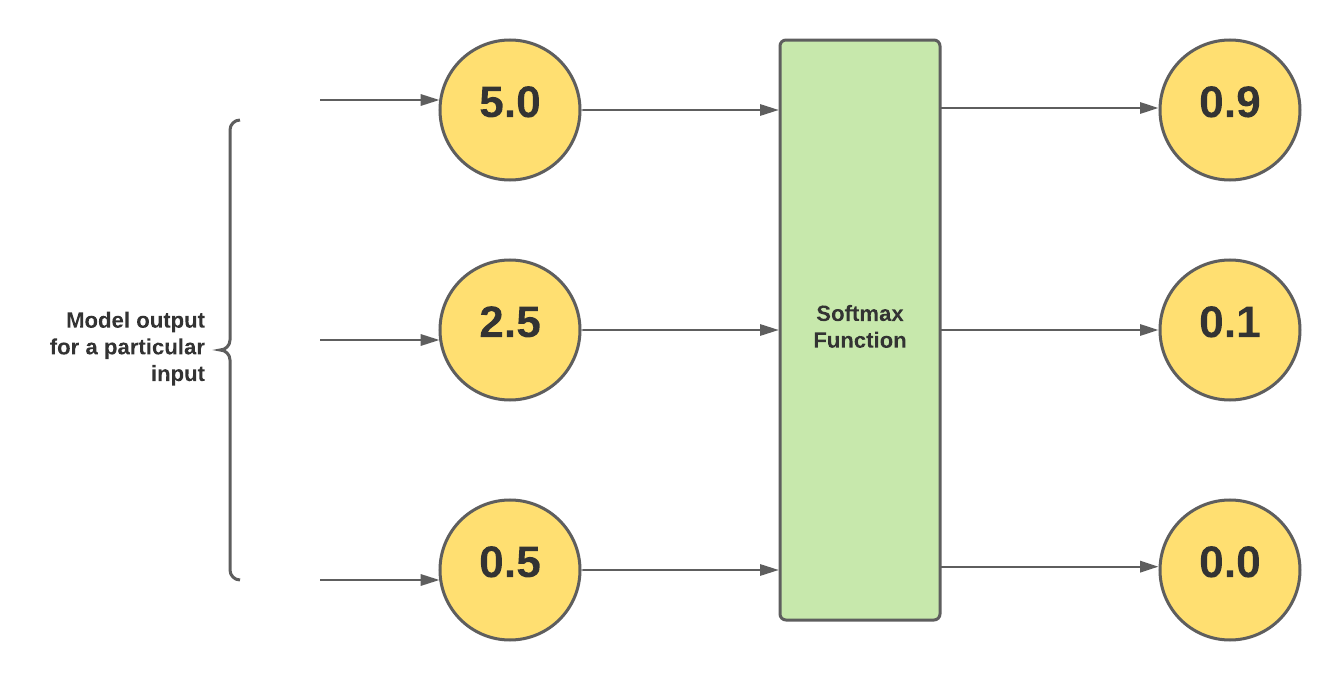

</center>

Entropía cruzada
=========================
Para medir el error de la red, no basta saber si la predicción es correcta o incorrecta, sino que se necesita saber la probabilidad de que la predicción sea correcta y la mayor posible, para esto se utiliza la entropía cruzada.

<center>

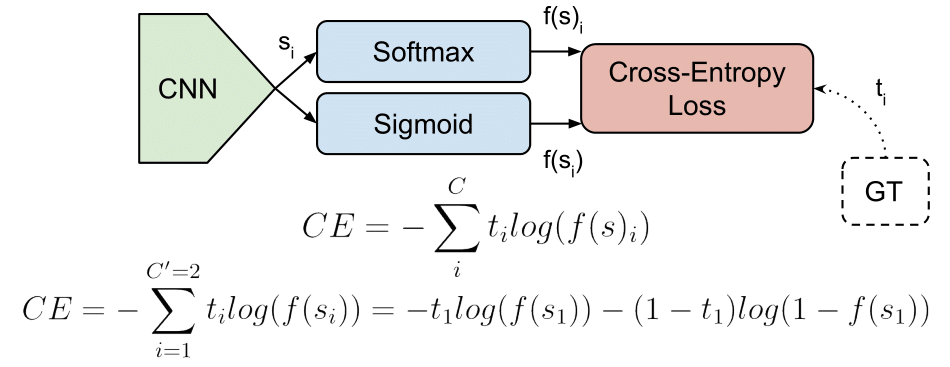

</center>

Implementación
=========================

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Generaremos imágenes de entrenamiento a partir del conjunto de datos para darle más variedad a las imágenes
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
training_set = train_datagen.flow_from_directory('datasets/training_set', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

# Generaremos imágenes de test a partir del conjunto de datos para darle más variedad a las imágenes
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('datasets/test_set', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [2]:
# Activamos el uso de la GPU
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
import tensorflow as tf

# Creamos la red neuronal convolucional
cnn = tf.keras.models.Sequential()

# Primera capa de convolución
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Segunda capa de convolución
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Tercera capa de convolución
cnn.add(tf.keras.layers.Flatten())

# Capa de conexión
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compilamos la red neuronal
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 30s 85ms/step - loss: 0.6708 - accuracy: 0.5813 - val_loss: 0.6454 - val_accuracy: 0.6285
Epoch 2/25
250/250 [==============================] - 22s 87ms/step - loss: 0.6167 - accuracy: 0.6586 - val_loss: 0.5739 - val_accuracy: 0.7065
Epoch 3/25
250/250 [==============================] - 21s 85ms/step - loss: 0.5645 - accuracy: 0.7074 - val_loss: 0.5333 - val_accuracy: 0.7350
Epoch 4/25
250/250 [==============================] - 21s 84ms/step - loss: 0.5270 - accuracy: 0.7350 - val_loss: 0.5302 - val_accuracy: 0.7425
Epoch 5/25
250/250 [==============================] - 23s 90ms/step - loss: 0.5069 - accuracy: 0.7506 - val_loss: 0.5021 - val_accuracy: 0.7590
Epoch 6/25
250/250 [==============================] - 22s 87ms/step - loss: 0.4835 - accuracy: 0.7694 - val_loss: 0.5234 - val_accuracy: 0.7440
Epoch 7/25
250/250 [==============================] - 22s 88ms/step - loss: 0.4741 - accuracy: 0.7740 - val_loss: 0.4905 - val_accuracy:

In [7]:
import numpy as np
from keras.preprocessing import image

# Predecimos un resultado
test_image = image.load_img('datasets/training_set/cats/cat.1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

# Mostramos el resultado
result = cnn.predict(test_image)
training_set.class_indices

if result[0][0] == 1: prediction = 'dog'
else: prediction = 'cat'

print(prediction)

cat
